# IMPORT LIBRARIES

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install pandas-ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218908 sha256=8a7f2a15cde23d09b46a190bf071ac472ffafbbd747297da1410bc5a5ca2b8b3
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas-ta


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from keras import initializers
from keras.layers import Dropout, Activation, Embedding, Convolution1D, MaxPooling1D, Input, Dense, \
                         BatchNormalization, Flatten, Reshape, Concatenate
from keras.callbacks import Callback, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam, RMSprop
from keras import regularizers
import seaborn as sns
import matplotlib.pyplot as plt
import time 
from sklearn import preprocessing
import os
from keras.callbacks import ModelCheckpoint, TensorBoard
from sklearn import preprocessing
from collections import deque  
from sklearn.metrics import fbeta_score, make_scorer
from keras.layers import LSTM, Dense, Dropout, Bidirectional

In [7]:
from datetime import datetime

In [8]:
from textblob import TextBlob

In [9]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense, Flatten
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
from keras.utils.vis_utils import plot_model

In [10]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

%matplotlib inline

import seaborn as sns
sns.set()

# LOADING DATA

## TA data 

In [11]:
data = yf.download(tickers ='EURUSD=X', end= '2022-11-11')
data.to_csv('EURUSDPrice.csv')
data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-04,0.974963,0.993818,0.974849,0.974963,0.974963,0
2022-11-07,0.992881,1.000500,0.991945,0.992881,0.992881,0
2022-11-08,1.001863,1.009418,0.997606,1.001863,1.001863,0
2022-11-09,1.008085,1.008878,1.001252,1.008085,1.008085,0
2022-11-10,1.001954,1.018299,0.993779,1.001954,1.001954,0


In [12]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['SMA']= ta.sma(data.Close, length=10)
data['EMA']= ta.ema(data.Close, length= 10)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)
macd = data.ta.macd(fast =12, slow =26, signal =9)
BB = data.ta.bbands(length=12, std =2)
ADX = data.ta.adx(length = 20)
ROC = data.ta.roc(length = 12)

dataTA = pd.concat([data, macd, BB, ADX, ROC], axis = 1)

In [13]:
dataTA['returns'] = (dataTA['Adj Close']/dataTA['Adj Close'].shift(1)) -1
dataTA['returnsclass'] = [1 if dataTA.returns[i]>0 else 0 for i in range(len(dataTA))]
dataTA.drop(['Volume'], axis=1, inplace=True)

In [14]:
dataTA.dropna(inplace=True)

In [15]:
data_set = dataTA.iloc[:, ]#.values
pd.set_option('display.max_columns', None)

data_set

,Open,High,Low,Close,Adj Close,RSI,SMA,EMA,EMAF,EMAM,EMAS,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,BBL_12_2.0,BBM_12_2.0,BBU_12_2.0,BBB_12_2.0,BBP_12_2.0,ADX_20,DMP_20,DMN_20,ROC_12,returns,returnsclass
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2004-06-25,1.217093,1.220301,1.211299,1.220301,1.220301,54.911255,1.211252,1.213470,1.212295,1.219270,1.228477,0.001650,0.000118,0.001532,1.198109,1.210410,1.222711,2.032554,0.902022,10.529251,19.865586,19.370648,1.328905,0.002380,1
2004-06-28,1.217493,1.222703,1.212797,1.218695,1.218695,53.966191,1.212501,1.214420,1.212905,1.219258,1.228347,0.001964,0.000346,0.001618,1.197928,1.211060,1.224191,2.168541,0.790725,10.197999,20.052943,18.542993,0.643457,-0.001316,0
2004-06-29,1.218695,1.219096,1.207496,1.209804,1.209804,48.968246,1.211821,1.213581,1.212610,1.219071,1.228101,0.001478,-0.000112,0.001590,1.199894,1.211751,1.223609,1.957117,0.417904,9.797026,19.049638,19.901794,0.690796,-0.007295,0
2004-06-30,1.209497,1.220301,1.206797,1.218398,1.218398,53.434557,1.213591,1.214457,1.213161,1.219058,1.227973,0.001766,0.000141,0.001625,1.200897,1.212768,1.224639,1.957702,0.737134,9.345300,18.464605,18.752050,1.011273,0.007103,1
2004-07-01,1.218294,1.220807,1.213902,1.216205,1.216205,52.185715,1.214872,1.214775,1.213451,1.219001,1.227817,0.001797,0.000138,0.001660,1.200904,1.212734,1.224565,1.950986,0.646672,8.885485,18.128930,18.186492,-0.032835,-0.001800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-04,0.974963,0.993818,0.974849,0.974963,0.974963,43.011123,0.990533,0.986115,0.985942,1.007830,1.025200,-0.000073,-0.000374,0.000301,0.969172,0.988323,1.007473,3.875445,0.151205,10.588025,18.945042,19.588859,-1.158250,-0.006600,0
2022-11-07,0.992881,1.000500,0.991945,0.992881,0.992881,53.118878,0.991220,0.987345,0.986603,1.007534,1.024771,0.000468,0.000133,0.000335,0.971761,0.989675,1.007590,3.620319,0.589474,10.311693,19.627748,17.736596,1.662092,0.018378,1
2022-11-08,1.001863,1.009418,0.997606,1.001863,1.001863,57.196524,0.992542,0.989985,0.988056,1.007421,1.024468,0.001603,0.001014,0.000588,0.974118,0.991673,1.009228,3.540559,0.790236,10.453165,21.704507,16.662629,2.451556,0.009047,1


In [16]:
data_set_count = data_set[['Close','returnsclass']].copy()
data_set_count = data_set_count.groupby('returnsclass').count()
data_set_count =data_set_count.rename(columns={'Close':'Count'})
data_set_count

,Count
returnsclass,
0,2394
1,2372


In [17]:
#drop range of rows so first date of data_set can match with twitter sentiment data
data_set=data_set.drop(data_set.index[0:2445])

In [18]:
data_set

,Open,High,Low,Close,Adj Close,RSI,SMA,EMA,EMAF,EMAM,EMAS,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,BBL_12_2.0,BBM_12_2.0,BBU_12_2.0,BBB_12_2.0,BBP_12_2.0,ADX_20,DMP_20,DMN_20,ROC_12,returns,returnsclass
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2013-12-16,1.373815,1.379900,1.373815,1.373928,1.373928,61.180787,1.368764,1.369946,1.364524,1.347592,1.339880,0.005894,0.002006,0.003889,1.350766,1.367213,1.383660,2.405920,0.704164,15.357994,22.396920,14.854837,1.220049,-0.000838,0
2013-12-17,1.376178,1.378210,1.372701,1.376292,1.376292,62.811095,1.370973,1.371100,1.365645,1.348160,1.340363,0.006076,0.001750,0.004326,1.351940,1.368537,1.385135,2.425581,0.733614,15.493713,21.662505,15.031101,1.168472,0.001720,1
2013-12-18,1.377107,1.378099,1.373479,1.377126,1.377126,63.392301,1.372779,1.372196,1.366738,1.348734,1.340849,0.006216,0.001512,0.004704,1.354059,1.370088,1.386118,2.339867,0.719524,15.622646,21.053065,14.608225,1.370242,0.000606,1
2013-12-19,1.368307,1.369394,1.365113,1.368495,1.368495,54.028961,1.373764,1.371523,1.366905,1.349125,1.341216,0.005567,0.000690,0.004877,1.358317,1.371279,1.384242,1.890574,0.392590,14.973438,19.547899,18.542880,1.055106,-0.006268,0
2013-12-20,1.365598,1.370870,1.362583,1.365579,1.365579,51.287513,1.373623,1.370442,1.366779,1.349451,1.341538,0.004762,-0.000092,0.004854,1.360510,1.371822,1.383133,1.649117,0.224048,14.297832,18.583230,19.134403,0.479314,-0.002130,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-04,0.974963,0.993818,0.974849,0.974963,0.974963,43.011123,0.990533,0.986115,0.985942,1.007830,1.025200,-0.000073,-0.000374,0.000301,0.969172,0.988323,1.007473,3.875445,0.151205,10.588025,18.945042,19.588859,-1.158250,-0.006600,0
2022-11-07,0.992881,1.000500,0.991945,0.992881,0.992881,53.118878,0.991220,0.987345,0.986603,1.007534,1.024771,0.000468,0.000133,0.000335,0.971761,0.989675,1.007590,3.620319,0.589474,10.311693,19.627748,17.736596,1.662092,0.018378,1
2022-11-08,1.001863,1.009418,0.997606,1.001863,1.001863,57.196524,0.992542,0.989985,0.988056,1.007421,1.024468,0.001603,0.001014,0.000588,0.974118,0.991673,1.009228,3.540559,0.790236,10.453165,21.704507,16.662629,2.451556,0.009047,1


In [19]:
# data_set.drop(['Open', 'High', 'Low', 'Close', 'Adj Close', 'returns'], axis=1, inplace=True)
data_set.drop(['returns'], axis=1, inplace=True)

In [20]:
#data_set.to_csv('data_set.csv')

# SA with TextBlob data for LSTM2

In [21]:
from google.colab import files

In [22]:
files.upload()

Saving EUcentralbank_finBert.csv to EUcentralbank_finBert.csv
Saving EUinflation_finBert.csv to EUinflation_finBert.csv
Saving EUinterestrate_finBert.csv to EUinterestrate_finBert.csv
Saving EUrecession_finBert.csv to EUrecession_finBert.csv
Saving EUtax_finBert.csv to EUtax_finBert.csv
Saving macroeconomic_finBert.csv to macroeconomic_finBert.csv
Saving USFed_finBert.csv to USFed_finBert.csv
Saving USinflation_finBert.csv to USinflation_finBert.csv
Saving USinterestrate_finBert.csv to USinterestrate_finBert.csv
Saving USrecession2_finBert.csv to USrecession2_finBert.csv
Saving UStax_finBert.csv to UStax_finBert.csv


### Loading Data

In [23]:
stock= pd.read_csv("EURUSDPrice.csv")

In [24]:
stock['Date'] = pd.to_datetime(stock['Date'], errors='coerce', utc= True)
stock['Date'] = stock['Date'].dt.strftime('%Y-%m-%d')

In [25]:
stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-01,1.203398,1.204007,1.194401,1.196501,1.196501,0
1,2003-12-02,1.196101,1.210903,1.194600,1.208897,1.208897,0
2,2003-12-03,1.209000,1.213003,1.207700,1.212298,1.212298,0
3,2003-12-04,1.212004,1.214403,1.204398,1.208094,1.208094,0
4,2003-12-05,1.207802,1.219096,1.206593,1.218695,1.218695,0
...,...,...,...,...,...,...,...
4910,2022-11-04,0.974963,0.993818,0.974849,0.974963,0.974963,0
4911,2022-11-07,0.992881,1.000500,0.991945,0.992881,0.992881,0
4912,2022-11-08,1.001863,1.009418,0.997606,1.001863,1.001863,0
4913,2022-11-09,1.008085,1.008878,1.001252,1.008085,1.008085,0


In [26]:
# tweet1 = pd.read_csv('TweetData4.csv')
# tweet2 = pd.read_csv('TweetData3.csv')
# tweet3 = pd.read_csv('TweetData2.csv')
tweet1 = pd.read_csv('EUcentralbank_finBert.csv')
tweet2 = pd.read_csv('EUinflation_finBert.csv')
tweet3 = pd.read_csv('EUinterestrate_finBert.csv')
tweet4 = pd.read_csv('EUrecession_finBert.csv')
tweet5 = pd.read_csv('EUtax_finBert.csv')
tweet6 = pd.read_csv('macroeconomic_finBert.csv')
tweet7 = pd.read_csv('USFed_finBert.csv')
tweet8 = pd.read_csv('USinflation_finBert.csv')
tweet9 = pd.read_csv('USinterestrate_finBert.csv')
tweet10 = pd.read_csv('USrecession2_finBert.csv')
tweet11 = pd.read_csv('UStax_finBert.csv')

In [27]:
frames = [tweet1, tweet2, tweet3, tweet4, tweet5, tweet6, tweet7, tweet8, tweet9, tweet10, tweet11]
tweets=pd.concat(frames)

In [28]:
tweets

,Date,User,twee,sentiment
0,12/16/2013,Habus,eu central bank warns against the bitcoin comp...,neutral
1,12/20/2013,torvale1953,european central bank president mario draghi e...,neutral
2,12/22/2013,fortunepayment,the european central bank ecb has created the ...,neutral
3,12/24/2013,nipped,small panic attack by the turkish central bank...,neutral
4,12/27/2013,skydbelltreatti,details of eu iran sanctions covers oil compan...,neutral
...,...,...,...,...
30102,11/10/2022,thatwhatmatters,only when shri is coming to bengaluru shri ...,neutral
30103,11/10/2022,PhilipBritz3,psastrike the right to strike is a mature poli...,neutral
30104,11/10/2022,grahamh941,bit of a long shot but does anyone have any ex...,neutral
30105,11/10/2022,OsgoodeIFLS,does implementing canadadisabilitybenefit act ...,negative


In [29]:
# #drop specific column (unnamed)
# tweets.drop(columns=tweets.columns[0], axis=1, inplace=True)

In [30]:
tweets['Date'] = pd.to_datetime(tweets['Date'], errors='coerce')
tweets['Date'] = tweets['Date'].dt.strftime('%Y-%m-%d')

In [31]:
tweets

,Date,User,twee,sentiment
0,2013-12-16,Habus,eu central bank warns against the bitcoin comp...,neutral
1,2013-12-20,torvale1953,european central bank president mario draghi e...,neutral
2,2013-12-22,fortunepayment,the european central bank ecb has created the ...,neutral
3,2013-12-24,nipped,small panic attack by the turkish central bank...,neutral
4,2013-12-27,skydbelltreatti,details of eu iran sanctions covers oil compan...,neutral
...,...,...,...,...
30102,2022-11-10,thatwhatmatters,only when shri is coming to bengaluru shri ...,neutral
30103,2022-11-10,PhilipBritz3,psastrike the right to strike is a mature poli...,neutral
30104,2022-11-10,grahamh941,bit of a long shot but does anyone have any ex...,neutral
30105,2022-11-10,OsgoodeIFLS,does implementing canadadisabilitybenefit act ...,negative


In [32]:
tweets= tweets.sort_values(by=['Date'])
# Drop duplicated tweets
tweets.drop_duplicates(subset='twee',inplace=True)

In [33]:
#rename Date column
tweets.rename(columns = {'Date':'DateRelease'}, inplace = True)

In [34]:
#tweets.to_csv('tweets.csv')

In [35]:
#counting tweets per day
def tweets_per_day(tweets):
  tweets['DateRelease'] = pd.to_datetime(tweets['DateRelease'], format='%Y-%m-%d')
  return tweets[['twee']].groupby(tweets['DateRelease'].dt.date).count()
result = tweets_per_day(tweets)

In [36]:
print(result)

             twee
DateRelease      
2013-12-16     67
2013-12-17    101
2013-12-18    156
2013-12-19     73
2013-12-20     54
...           ...
2022-11-06    389
2022-11-07    594
2022-11-08    551
2022-11-09    688
2022-11-10   1063

[3252 rows x 1 columns]


In [37]:
def getTextSubjectivity(txt):
  return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
  return TextBlob(txt).sentiment.polarity

In [38]:
tweets['Subjectivity']= tweets['twee'].apply(getTextSubjectivity)
tweets['Polarity']= tweets['twee'].apply(getTextPolarity)

In [39]:
def getTextAnalysis(a):
  if a<0:
    return 'Negative'
  elif a==0:
    return 'Neutral'
  else:
    return 'Positive'

In [40]:
tweets['Score']= tweets['Polarity'].apply(getTextAnalysis)

In [41]:
tweets

,DateRelease,User,twee,sentiment,Subjectivity,Polarity,Score
0,2013-12-16,Habus,eu central bank warns against the bitcoin comp...,neutral,0.250000,0.000000,Neutral
10,2013-12-16,Educ_Reform,is it a surprise that finance has not to date ...,neutral,1.000000,0.000000,Neutral
9,2013-12-16,TotesFacts,the cost of college textbooks in the us has ri...,neutral,0.000000,0.000000,Neutral
8,2013-12-16,mrymler,inb4 ala relax lah maryam the future will work...,neutral,0.125000,0.000000,Neutral
7,2013-12-16,KeithMcCullough,newsflash deflating the inflation in 2014 prov...,neutral,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...
152080,2022-11-10,LTSummer22,why cant my woke company give me a raise for i...,neutral,0.175000,-0.175000,Negative
152079,2022-11-10,ajbell,big day for us inflation figures whsmith rest...,positive,0.444444,0.244444,Positive
152078,2022-11-10,wheeliedealer,stocks looking bit soggy but nothing dramatic ...,negative,0.550000,-0.216667,Negative
152085,2022-11-10,alessiVT,media reports many people are anxious about in...,neutral,0.375000,0.087500,Positive


In [42]:
# Drop duplicated tweets
tweets.drop_duplicates(subset='twee',inplace=True)

In [43]:
tweets.shape

(356396, 7)

In [44]:
# Get the day of week column
tweets['weekday']= pd.to_datetime(tweets['DateRelease']).dt.day_name(locale='en_US.utf8')

In [45]:
import datetime
DD = datetime.timedelta(days=1)
#filter for saturdays and Sunday date -1, -2 to become friday
#Saturdays
saturday = tweets['weekday'] == "Saturday"
tweets.loc[saturday,"DateRelease"] = pd.to_datetime(tweets.loc[saturday,"DateRelease"]).dt.date - DD

In [46]:
#Sundays
DD = datetime.timedelta(days=2)

sunday = tweets['weekday'] == "Sunday"
tweets.loc[sunday,"DateRelease"] = pd.to_datetime(tweets.loc[sunday,"DateRelease"]).dt.date - DD

In [47]:
tweets

,DateRelease,User,twee,sentiment,Subjectivity,Polarity,Score,weekday
0,2013-12-16,Habus,eu central bank warns against the bitcoin comp...,neutral,0.250000,0.000000,Neutral,Monday
10,2013-12-16,Educ_Reform,is it a surprise that finance has not to date ...,neutral,1.000000,0.000000,Neutral,Monday
9,2013-12-16,TotesFacts,the cost of college textbooks in the us has ri...,neutral,0.000000,0.000000,Neutral,Monday
8,2013-12-16,mrymler,inb4 ala relax lah maryam the future will work...,neutral,0.125000,0.000000,Neutral,Monday
7,2013-12-16,KeithMcCullough,newsflash deflating the inflation in 2014 prov...,neutral,0.000000,0.000000,Neutral,Monday
...,...,...,...,...,...,...,...,...
152080,2022-11-10,LTSummer22,why cant my woke company give me a raise for i...,neutral,0.175000,-0.175000,Negative,Thursday
152079,2022-11-10,ajbell,big day for us inflation figures whsmith rest...,positive,0.444444,0.244444,Positive,Thursday
152078,2022-11-10,wheeliedealer,stocks looking bit soggy but nothing dramatic ...,negative,0.550000,-0.216667,Negative,Thursday
152085,2022-11-10,alessiVT,media reports many people are anxious about in...,neutral,0.375000,0.087500,Positive,Thursday


In [48]:
tweets.drop(['twee','sentiment', 'Score'],axis=1, inplace=True)

In [49]:
tweets['DateRelease']=pd.to_datetime(tweets['DateRelease'])

In [50]:
tweet=tweets.groupby('DateRelease').mean()

<ipython-input-50-a468f92e7872>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tweet=tweets.groupby('DateRelease').mean()


In [51]:
tweet

,Subjectivity,Polarity
DateRelease,,
2013-12-16,0.286844,0.041451
2013-12-17,0.319704,0.095234
2013-12-18,0.284293,0.055376
2013-12-19,0.238004,0.041377
2013-12-20,0.273545,0.040769
...,...,...
2022-11-04,0.396195,0.050284
2022-11-07,0.400084,0.060969
2022-11-08,0.412699,0.055271


In [52]:
tweet = tweet.sort_index().reset_index(drop=False) #reset to have an auto index

In [53]:
tweet

,DateRelease,Subjectivity,Polarity
0,2013-12-16,0.286844,0.041451
1,2013-12-17,0.319704,0.095234
2,2013-12-18,0.284293,0.055376
3,2013-12-19,0.238004,0.041377
4,2013-12-20,0.273545,0.040769
...,...,...,...
2319,2022-11-04,0.396195,0.050284
2320,2022-11-07,0.400084,0.060969
2321,2022-11-08,0.412699,0.055271
2322,2022-11-09,0.424420,0.034548


### Merging 2 datasets

In [54]:
tweet = tweet[tweet.DateRelease.isin(stock.Date)]

In [55]:
stock['Date']= pd.to_datetime(stock['Date']) 
tweet['DateRelease']= pd.to_datetime(tweet['DateRelease']) 

df_final = pd.merge(left=tweet, left_on='DateRelease',
         right=stock, right_on='Date')

df_final

<ipython-input-55-2087eda2d3ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet['DateRelease']= pd.to_datetime(tweet['DateRelease'])


,DateRelease,Subjectivity,Polarity,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-16,0.286844,0.041451,2013-12-16,1.373815,1.379900,1.373815,1.373928,1.373928,0
1,2013-12-17,0.319704,0.095234,2013-12-17,1.376178,1.378210,1.372701,1.376292,1.376292,0
2,2013-12-18,0.284293,0.055376,2013-12-18,1.377107,1.378099,1.373479,1.377126,1.377126,0
3,2013-12-19,0.238004,0.041377,2013-12-19,1.368307,1.369394,1.365113,1.368495,1.368495,0
4,2013-12-20,0.273545,0.040769,2013-12-20,1.365598,1.370870,1.362583,1.365579,1.365579,0
...,...,...,...,...,...,...,...,...,...,...
2316,2022-11-04,0.396195,0.050284,2022-11-04,0.974963,0.993818,0.974849,0.974963,0.974963,0
2317,2022-11-07,0.400084,0.060969,2022-11-07,0.992881,1.000500,0.991945,0.992881,0.992881,0
2318,2022-11-08,0.412699,0.055271,2022-11-08,1.001863,1.009418,0.997606,1.001863,1.001863,0
2319,2022-11-09,0.424420,0.034548,2022-11-09,1.008085,1.008878,1.001252,1.008085,1.008085,0


In [56]:
df_final['returns'] = (df_final['Adj Close']/df_final['Adj Close'].shift(1)) -1
df_final['returnsclass'] = [1 if df_final.returns[i]>0 else 0 for i in range(len(df_final))]

In [57]:
df_final

,DateRelease,Subjectivity,Polarity,Date,Open,High,Low,Close,Adj Close,Volume,returns,returnsclass
0,2013-12-16,0.286844,0.041451,2013-12-16,1.373815,1.379900,1.373815,1.373928,1.373928,0,NaN,0
1,2013-12-17,0.319704,0.095234,2013-12-17,1.376178,1.378210,1.372701,1.376292,1.376292,0,0.001720,1
2,2013-12-18,0.284293,0.055376,2013-12-18,1.377107,1.378099,1.373479,1.377126,1.377126,0,0.000606,1
3,2013-12-19,0.238004,0.041377,2013-12-19,1.368307,1.369394,1.365113,1.368495,1.368495,0,-0.006268,0
4,2013-12-20,0.273545,0.040769,2013-12-20,1.365598,1.370870,1.362583,1.365579,1.365579,0,-0.002130,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2316,2022-11-04,0.396195,0.050284,2022-11-04,0.974963,0.993818,0.974849,0.974963,0.974963,0,-0.006600,0
2317,2022-11-07,0.400084,0.060969,2022-11-07,0.992881,1.000500,0.991945,0.992881,0.992881,0,0.018378,1
2318,2022-11-08,0.412699,0.055271,2022-11-08,1.001863,1.009418,0.997606,1.001863,1.001863,0,0.009047,1
2319,2022-11-09,0.424420,0.034548,2022-11-09,1.008085,1.008878,1.001252,1.008085,1.008085,0,0.006210,1


In [58]:
df_final.drop(['Volume','Date', 'returns'], axis=1, inplace=True)

In [59]:
df_final = df_final.set_index('DateRelease')
df_final

,Subjectivity,Polarity,Open,High,Low,Close,Adj Close,returnsclass
DateRelease,,,,,,,,
2013-12-16,0.286844,0.041451,1.373815,1.379900,1.373815,1.373928,1.373928,0
2013-12-17,0.319704,0.095234,1.376178,1.378210,1.372701,1.376292,1.376292,1
2013-12-18,0.284293,0.055376,1.377107,1.378099,1.373479,1.377126,1.377126,1
2013-12-19,0.238004,0.041377,1.368307,1.369394,1.365113,1.368495,1.368495,0
2013-12-20,0.273545,0.040769,1.365598,1.370870,1.362583,1.365579,1.365579,0
...,...,...,...,...,...,...,...,...
2022-11-04,0.396195,0.050284,0.974963,0.993818,0.974849,0.974963,0.974963,0
2022-11-07,0.400084,0.060969,0.992881,1.000500,0.991945,0.992881,0.992881,1
2022-11-08,0.412699,0.055271,1.001863,1.009418,0.997606,1.001863,1.001863,1


# STACKED LSTM

## SA DATA PROCESSING

In [60]:
# Separate the features (historical prices and technical indicators) and the target (movement)
features_SA = df_final.iloc[:, :-1]
target_SA = df_final['returnsclass'].values

In [61]:
scaler = MinMaxScaler()
scaled_features_SA = scaler.fit_transform(features_SA)
scaled_target_SA = scaler.fit_transform(target_SA.reshape(-1, 1))

In [62]:
print(scaled_features_SA.shape)
print(scaled_target_SA.shape)

(2321, 7)
(2321, 1)


In [63]:
# Reshape the input data for LSTM (samples, time steps, features)
lookback = 14  # Number of previous time steps to consider
num_features_SA = 7
num_samples_SA = scaled_features_SA.shape[0]

In [64]:
num_sequences_SA = num_samples_SA - lookback + 1
num_sequences_SA

2308

In [65]:
X_SA = np.zeros((num_sequences_SA, lookback, num_features_SA))

for i in range(num_sequences_SA):
    X_SA[i] = scaled_features_SA[i : i + lookback]
print(X_SA.shape)

(2308, 14, 7)


In [66]:
y_SA = scaled_target_SA[lookback-1:lookback-1+num_sequences_SA]
y_SA = np.reshape(y_SA, (y_SA.shape[0], 1))
print(y_SA.shape)

(2308, 1)


In [67]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_SA_train, X_SA_test, y_SA_train, y_SA_test = train_test_split(X_SA, y_SA, test_size=0.2, random_state=42)
print (X_SA_train.shape)
print (y_SA_train.shape)

(1846, 14, 7)
(1846, 1)


## TA DATA PROCESSING

In [68]:
# Separate the features (historical prices and technical indicators) and the target (movement)
features = data_set.iloc[:, :-1]
target = data_set['returnsclass'].values

In [69]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.reshape(-1, 1))

In [70]:
print(scaled_features.shape)
print(scaled_target.shape)

(2321, 23)
(2321, 1)


In [71]:
# Reshape the input data for LSTM (samples, time steps, features)
lookback = 14  # Number of previous time steps to consider
num_features = 23
num_samples = scaled_features.shape[0]

In [72]:
num_sequences = num_samples - lookback + 1
num_sequences

2308

In [73]:
X = np.zeros((num_sequences, lookback, num_features))

for i in range(num_sequences):
    X[i] = scaled_features[i : i + lookback]
print(X.shape)

(2308, 14, 23)


In [74]:
y = scaled_target[lookback-1:lookback-1+num_sequences]
y = np.reshape(y, (y.shape[0], 1))
print(y.shape)

(2308, 1)


In [75]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print (X_train.shape)
print (y_train.shape)

(1846, 14, 23)
(1846, 1)


## MODEL

In [76]:
from tensorflow import keras
# Define the input shapes for the LSTM models
input_shape1 = (lookback, num_features_SA)
input_shape2 = (lookback, num_features)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 14, 23)]     0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 14, 7)]      0           []                               
                                                                                                  
 lstm_2 (LSTM)                  (None, 14, 150)      104400      ['input_2[0][0]']                
                                                                                                  
 lstm (LSTM)                    (None, 14, 100)      43200       ['input_1[0][0]']                
                                                                                            

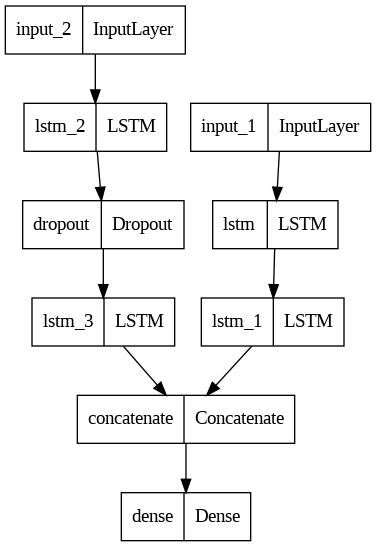

In [77]:
# Create the first LSTM model
input1 = keras.Input(shape=input_shape1)
lstm1 = keras.layers.LSTM(units=100, return_sequences=True)(input1)
# dropout1 = keras.layers.Dropout(0.2)(lstm1)
# lstm2 = keras.layers.LSTM(units=50, return_sequences=True)(dropout1)
# dropout2 = keras.layers.Dropout(0.2)(lstm2)
lstm3 = keras.layers.LSTM(units=25)(lstm1)
model1 = keras.Model(inputs=input1, outputs=lstm3)

# Create the second LSTM model
input2 = keras.Input(shape=input_shape2)
lstm4 = keras.layers.LSTM(units=150, return_sequences=True)(input2)
dropout3 = keras.layers.Dropout(0.2)(lstm4)
# lstm5 = keras.layers.LSTM(units=50, return_sequences=True)(dropout3)
# dropout4 = keras.layers.Dropout(0.2)(lstm5)
lstm6 = keras.layers.LSTM(units=75)(dropout3)
model2 = keras.Model(inputs=input2, outputs=lstm6)

# Get the last layer outputs of each model
output1 = model1.layers[-1].output
output2 = model2.layers[-1].output

# Concatenate the last layer outputs
concatenated_output = keras.layers.concatenate([output1, output2])

# Add a fully connected layer
# dense1 = keras.layers.Dense(units=150, activation='relu')(concatenated_output)
# dense2 = keras.layers.Dense(units=1, activation='sigmoid')(dense1)

dense2 = keras.layers.Dense(units=1, activation='sigmoid')(concatenated_output)

# Create the combined model
combined_model = keras.Model(inputs=[model1.input, model2.input], outputs=dense2)

combined_model.summary()
plot_model(combined_model)

In [78]:
# Compile the model
combined_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history= combined_model.fit([X_SA_train, X_train], y_train, epochs=40, batch_size=32, validation_split = 0.2 )

Epoch 1/40
47/47 [==============================] - 14s 43ms/step - loss: 0.7016 - accuracy: 0.5088 - val_loss: 0.6934 - val_accuracy: 0.4865
Epoch 2/40
47/47 [==============================] - 0s 10ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6922 - val_accuracy: 0.5135
Epoch 3/40
47/47 [==============================] - 0s 10ms/step - loss: 0.6919 - accuracy: 0.5203 - val_loss: 0.6932 - val_accuracy: 0.4919
Epoch 4/40
47/47 [==============================] - 0s 10ms/step - loss: 0.6917 - accuracy: 0.5183 - val_loss: 0.6910 - val_accuracy: 0.5378
Epoch 5/40
47/47 [==============================] - 0s 10ms/step - loss: 0.6913 - accuracy: 0.5244 - val_loss: 0.6893 - val_accuracy: 0.5351
Epoch 6/40
47/47 [==============================] - 0s 10ms/step - loss: 0.6902 - accuracy: 0.5535 - val_loss: 0.6883 - val_accuracy: 0.5838
Epoch 7/40
47/47 [==============================] - 0s 10ms/step - loss: 0.6812 - accuracy: 0.5894 - val_loss: 0.6589 - val_accuracy: 0.6054
Epoch 8/40
4

In [79]:
# Evaluate the model
loss, accuracy = combined_model.evaluate([X_SA_test, X_test], y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

15/15 [==============================] - 0s 5ms/step - loss: 0.0988 - accuracy: 0.9632
Test Loss: 0.09883232414722443
Test Accuracy: 0.963203489780426


In [80]:
predictions = combined_model.predict([X_SA_test,X_test])

15/15 [==============================] - 1s 3ms/step


In [81]:
threshold = 0.5  # Threshold to convert probabilities to binary labels

incorrect_predictions = []

# Convert predicted probabilities to binary labels
binary_predictions = np.where(predictions > threshold, 1, 0)

for true_label, predicted_label in zip(y_test, binary_predictions):
    if true_label != predicted_label:
        incorrect_predictions.append((true_label, predicted_label))

incorrect_predictions_count = len(incorrect_predictions)
print(f"Number of Incorrect Predictions: {incorrect_predictions_count}")

Number of Incorrect Predictions: 17


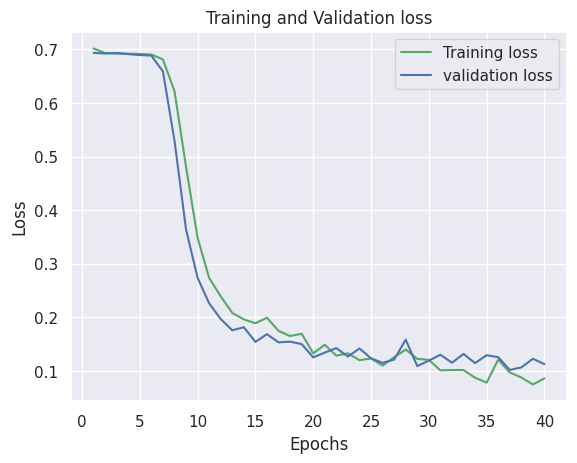

In [82]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,41)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

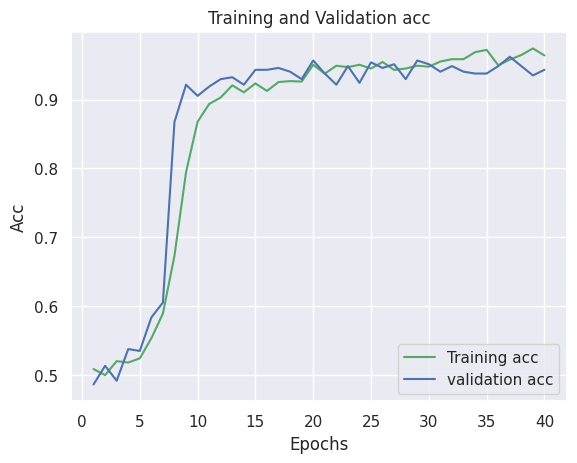

In [83]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,41)
plt.plot(epochs, acc_train, 'g', label='Training acc')
plt.plot(epochs, acc_val, 'b', label='validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [84]:
from sklearn.metrics import classification_report, confusion_matrix

# Convert predicted probabilities to binary labels
binary_predictions = np.where(predictions > threshold, 1, 0)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, binary_predictions, digits=4))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, binary_predictions))

Classification Report:
              precision    recall  f1-score   support

         0.0     0.9574    0.9698    0.9636       232
         1.0     0.9692    0.9565    0.9628       230

    accuracy                         0.9632       462
   macro avg     0.9633    0.9632    0.9632       462
weighted avg     0.9633    0.9632    0.9632       462

Confusion Matrix:
[[225   7]
 [ 10 220]]


In [85]:
# Prepare the input data for prediction (assuming X_test represents the most recent data available)
input_data_SA = scaled_features_SA[-lookback:]  # Select the most recent lookback period as input data
# Reshape the input data
input_data_SA = np.reshape(input_data_SA, (1, lookback, num_features_SA))  # Adjust the shape based on your specific lookback and feature dimensions

input_data = scaled_features[-lookback:]  # Select the most recent lookback period as input data
# Reshape the input data
input_data = np.reshape(input_data, (1, lookback, num_features))  # Adjust the shape based on your specific lookback and feature dimensions

# Make the prediction
prediction = combined_model.predict([input_data_SA, input_data])

# Interpret the prediction
if prediction > 0.5:
    price_movement = "Positive"
else:
    price_movement = "Negative"

# Print the predicted price movement
print("Next day's price movement:", price_movement)

1/1 [==============================] - 0s 22ms/step
Next day's price movement: Negative


# SINGLE LSTM

## DATA PROCESSING

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
df_scaled = sc.fit_transform(df_final)
print(df_scaled)
print(df_scaled[0].size)

[[0.38340208 0.58195459 0.95575293 ... 0.95580024 0.95580024 0.        ]
 [0.47608901 0.72540569 0.96120628 ... 0.96125319 0.96125319 1.        ]
 [0.37620764 0.61909539 0.96334911 ... 0.96317718 0.96317718 1.        ]
 ...
 [0.7383921  0.6188162  0.09747834 ... 0.09745652 0.09745652 1.        ]
 [0.77145418 0.56354413 0.11183391 ... 0.11180888 0.11180888 1.        ]
 [0.6021477  0.60194341 0.09768685 ... 0.09766498 0.09766498 0.        ]]
8


In [ ]:
x = []
backcandles = 14
print(df_scaled.shape[0])
for j in range(7):#data_set_scaled[0].size):#last columns is target not X
    x.append([])
    for i in range(backcandles, df_scaled.shape[0]):#backcandles+2
        x[j].append(df_scaled[i-backcandles:i, j])

2321


In [ ]:
#move axis from 0 to position 2
x=np.moveaxis(x, [0], [2])

In [ ]:
x, yi =np.array(x), np.array(df_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
print(x)
print(x.shape)
print(y)
print(y.shape)

[[[0.38340208 0.58195459 0.95575293 ... 0.96010293 0.95580024 0.95580024]
  [0.47608901 0.72540569 0.96120628 ... 0.95755404 0.96125319 0.96125319]
  [0.37620764 0.61909539 0.96334911 ... 0.95933491 0.96317718 0.96317718]
  ...
  [0.72044665 0.63812572 0.97181727 ... 0.96537358 0.97212747 0.97212747]
  [0.66227951 0.54656106 0.9573214  ... 0.96144159 0.9571071  0.9571071 ]
  [0.50655549 0.5550451  0.96216794 ... 0.93598753 0.96212745 0.96212745]]

 [[0.47608901 0.72540569 0.96120628 ... 0.95755404 0.96125319 0.96125319]
  [0.37620764 0.61909539 0.96334911 ... 0.95933491 0.96317718 0.96317718]
  [0.24564348 0.58175883 0.94304367 ... 0.94020116 0.94326461 0.94326461]
  ...
  [0.66227951 0.54656106 0.9573214  ... 0.96144159 0.9571071  0.9571071 ]
  [0.50655549 0.5550451  0.96216794 ... 0.93598753 0.96212745 0.96212745]
  [0.45093754 0.67645309 0.93916045 ... 0.92889675 0.93903629 0.93903629]]

 [[0.37620764 0.61909539 0.96334911 ... 0.95933491 0.96317718 0.96317718]
  [0.24564348 0.581758

In [ ]:
# split data into train test sets
splitlimit = int(len(x)*0.8)
print(splitlimit)
x_train, x_test = x[:splitlimit], x[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

1845
(1845, 14, 7)
(462, 14, 7)
(1845, 1)
(462, 1)
[[0.]
 [0.]
 [1.]
 ...
 [1.]
 [1.]
 [0.]]


In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)
print(data_set_scaled[0].size)

[[0.95575293 0.95554347 0.96010293 ... 0.65249573 0.47806662 0.        ]
 [0.96120628 0.95163066 0.95755404 ... 0.64874876 0.5235121  1.        ]
 [0.96334911 0.95137574 0.95933491 ... 0.66340681 0.50371678 1.        ]
 ...
 [0.09747834 0.09815244 0.09969114 ... 0.74196134 0.65365144 1.        ]
 [0.11183391 0.09690325 0.10802951 ... 0.7265157  0.60325611 1.        ]
 [0.09768685 0.11870528 0.09093904 ... 0.66161841 0.38492282 0.        ]]
25


In [ ]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 14
print(data_set_scaled.shape[0])
for j in range(23):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

2321


In [ ]:
#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

In [ ]:
X, Yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
Y=np.reshape(Yi,(len(Yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(Y)
print(Y.shape)

[[[0.95575293 0.95554347 0.96010293 ... 0.54253366 0.29084473 0.65249573]
  [0.96120628 0.95163066 0.95755404 ... 0.51841105 0.29642531 0.64874876]
  [0.96334911 0.95137574 0.95933491 ... 0.49839338 0.28303693 0.66340681]
  ...
  [0.97181727 0.95867527 0.96537358 ... 0.58146359 0.270451   0.59516472]
  [0.9573214  0.9509233  0.96144159 ... 0.550674   0.28532339 0.56685782]
  [0.96216794 0.94991302 0.93598753 ... 0.48930339 0.45176878 0.56586288]]

 [[0.96120628 0.95163066 0.95755404 ... 0.51841105 0.29642531 0.64874876]
  [0.96334911 0.95137574 0.95933491 ... 0.49839338 0.28303693 0.66340681]
  [0.94304367 0.93122927 0.94020116 ... 0.4489547  0.4076092  0.64051303]
  ...
  [0.9573214  0.9509233  0.96144159 ... 0.550674   0.28532339 0.56685782]
  [0.96216794 0.94991302 0.93598753 ... 0.48930339 0.45176878 0.56586288]
  [0.93916045 0.92637626 0.92889675 ... 0.42673069 0.44843591 0.50866035]]

 [[0.96334911 0.95137574 0.95933491 ... 0.49839338 0.28303693 0.66340681]
  [0.94304367 0.931229

In [ ]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
Y_train, Y_test = Y[:splitlimit], Y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_train)

1845
(1845, 14, 23)
(462, 14, 23)
(1845, 1)
(462, 1)
[[0.]
 [0.]
 [1.]
 ...
 [1.]
 [1.]
 [0.]]


## Building 2 LSTM models and join output with FCNN (consolidated)

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 model_input1 (InputLayer)      [(None, 14, 23)]     0           []                               
                                                                                                  
 model_input2 (InputLayer)      [(None, 14, 7)]      0           []                               
                                                                                                  
 model_LSTM_layer1 (LSTM)       (None, 150)          104400      ['model_input1[0][0]']           
                                                                                                  
 model_LSTM_layer2 (LSTM)       (None, 150)          94800       ['model_input2[0][0]']           
                                                                                           

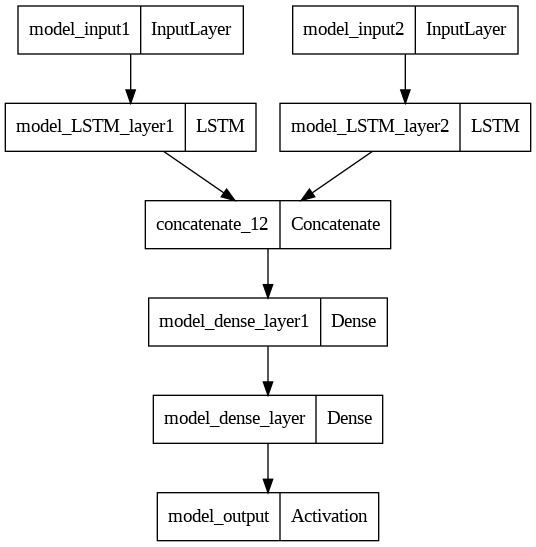

In [ ]:
np.random.seed(580)
#LSTM Model 1 for Technical Analysis 
input1 = Input(shape=(backcandles, 23), name='model_input1')
model_inputs1 = LSTM(150, name='model_LSTM_layer1')(input1)

#LSTM Model 2 for Sentiment Analysis
input2 = Input(shape=(backcandles, 7), name='model_input2')
model_inputs2 = LSTM(150, name='model_LSTM_layer2')(input2)

#Concatenating 2 LSTM outputs
model_inputs = concatenate([model_inputs1 ,model_inputs2], axis=1)

# model_inputs1 = Dense(64, name='model_flatten_layer1')(model_inputs1)
#model_inputs2 = Dense(64, name='model_flatten_layer2')(model_inputs2)

model_inputs = Dense(150, activation='relu', name='model_dense_layer1')(model_inputs)

model_inputs = Dense(1, name='model_dense_layer')(model_inputs)

model_output = Activation('sigmoid', name='model_output')(model_inputs)
model = Model(inputs=[input1,input2], outputs=model_output)
model.summary()
plot_model(model)

In [ ]:
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
history= model.fit(x=[X_train,x_train], y=[Y_train, y_train], batch_size=32, epochs=40, shuffle=True, validation_split = 0.15)

Epoch 1/40
49/49 [==============================] - 5s 25ms/step - loss: 0.2516 - val_loss: 0.2501
Epoch 2/40
49/49 [==============================] - 0s 8ms/step - loss: 0.2508 - val_loss: 0.2524
Epoch 3/40
49/49 [==============================] - 0s 8ms/step - loss: 0.2508 - val_loss: 0.2487
Epoch 4/40
49/49 [==============================] - 0s 9ms/step - loss: 0.2508 - val_loss: 0.2530
Epoch 5/40
49/49 [==============================] - 0s 8ms/step - loss: 0.2502 - val_loss: 0.2504
Epoch 6/40
49/49 [==============================] - 0s 8ms/step - loss: 0.2498 - val_loss: 0.2513
Epoch 7/40
49/49 [==============================] - 0s 8ms/step - loss: 0.2499 - val_loss: 0.2520
Epoch 8/40
49/49 [==============================] - 0s 8ms/step - loss: 0.2490 - val_loss: 0.2492
Epoch 9/40
49/49 [==============================] - 0s 8ms/step - loss: 0.2497 - val_loss: 0.2505
Epoch 10/40
49/49 [==============================] - 0s 8ms/step - loss: 0.2494 - val_loss: 0.2509
Epoch 11/40
49/49 

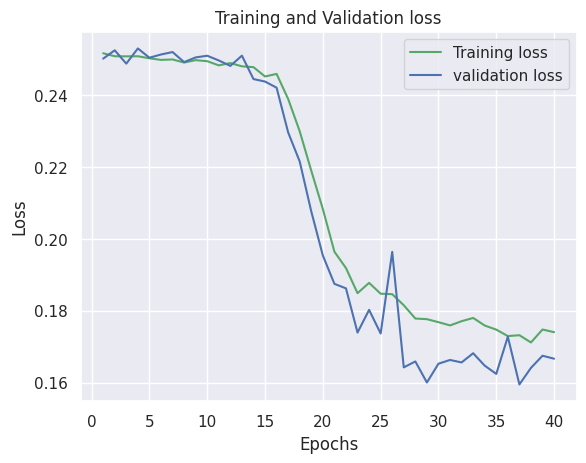

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,41)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict([X_test, x_test])
y_pred=np.where(y_pred > 0.50, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

15/15 [==============================] - 1s 4ms/step
[0] [0.]
[1] [1.]
[0] [0.]
[1] [1.]
[0] [1.]
[1] [1.]
[0] [1.]
[0] [1.]
[0] [0.]
[0] [1.]


In [ ]:
print(classification_report(y_test, y_pred, digits=4))
print(confusion_matrix(y_test, y_pred))

MNB_f1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
MNB_accuracy = round((accuracy_score(y_test, y_pred)*100),2)

print("Accuracy : " , MNB_accuracy , " %")
print("f1_score : " , MNB_f1)

              precision    recall  f1-score   support

         0.0     0.6950    0.8000    0.7438       245
         1.0     0.7278    0.6037    0.6599       217

    accuracy                         0.7078       462
   macro avg     0.7114    0.7018    0.7019       462
weighted avg     0.7104    0.7078    0.7044       462

[[196  49]
 [ 86 131]]
Accuracy :  70.78  %
f1_score :  0.704


## Building 2 LSTM models and join output with FCNN (separated)

### LSTM Model 1 for Technical Analysis data

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model1_input (InputLayer)   [(None, 14, 23)]          0         
                                                                 
 model1_first_layer (LSTM)   (None, 150)               104400    
                                                                 
 model1_dense_layer (Dense)  (None, 1)                 151       
                                                                 
 model1_output (Activation)  (None, 1)                 0         
                                                                 
Total params: 104,551
Trainable params: 104,551
Non-trainable params: 0
_________________________________________________________________


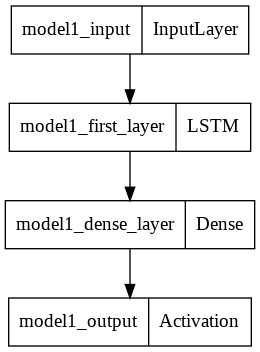

In [ ]:
np.random.seed()
#LSTM Model 1 for Technical Analysis 
model1_input = Input(shape=(backcandles, 23), name='model1_input')
model1_inputs = LSTM(150, name='model1_first_layer')(model1_input)
model1_inputs = Dense(1, name='model1_dense_layer')(model1_inputs)
model1_output = Activation('sigmoid', name='model1_output')(model1_inputs)
model1 = Model(inputs=model1_input, outputs=model1_output)
model1.summary()
plot_model(model1)

In [ ]:
adam = optimizers.Adam()
model1.compile(optimizer=adam, loss='mse')
model1.fit(x=X_train, y=Y_train, batch_size=16, epochs=20, shuffle=True, validation_split = 0.1)

Epoch 1/20
104/104 [==============================] - 3s 8ms/step - loss: 0.2528 - val_loss: 0.2486
Epoch 2/20
104/104 [==============================] - 0s 4ms/step - loss: 0.2511 - val_loss: 0.2537
Epoch 3/20
104/104 [==============================] - 0s 4ms/step - loss: 0.2496 - val_loss: 0.2509
Epoch 4/20
104/104 [==============================] - 1s 5ms/step - loss: 0.2494 - val_loss: 0.2521
Epoch 5/20
104/104 [==============================] - 0s 4ms/step - loss: 0.2491 - val_loss: 0.2501
Epoch 6/20
104/104 [==============================] - 0s 4ms/step - loss: 0.2484 - val_loss: 0.2528
Epoch 7/20
104/104 [==============================] - 0s 4ms/step - loss: 0.2469 - val_loss: 0.2425
Epoch 8/20
104/104 [==============================] - 0s 4ms/step - loss: 0.2426 - val_loss: 0.2485
Epoch 9/20
104/104 [==============================] - 1s 5ms/step - loss: 0.2390 - val_loss: 0.2414
Epoch 10/20
104/104 [==============================] - 0s 4ms/step - loss: 0.2339 - val_loss: 0.2369

In [ ]:
model1_out = keras.Model(inputs=model1.input,
                                       outputs=model1.get_layer('model1_output').output)
model1_out = model1_out(X)

In [ ]:
print(model1_out)

tf.Tensor(
[[0.6096402 ]
 [0.6082507 ]
 [0.6065354 ]
 ...
 [0.5648804 ]
 [0.56605804]
 [0.5710062 ]], shape=(2272, 1), dtype=float32)


### LSTM Model 2 for Sentiment Analysis data

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model2_input (InputLayer)   [(None, 14, 7)]           0         
                                                                 
 model2_first_layer (LSTM)   (None, 150)               94800     
                                                                 
 model2_dense_layer (Dense)  (None, 1)                 151       
                                                                 
 model2_output (Activation)  (None, 1)                 0         
                                                                 
Total params: 94,951
Trainable params: 94,951
Non-trainable params: 0
_________________________________________________________________


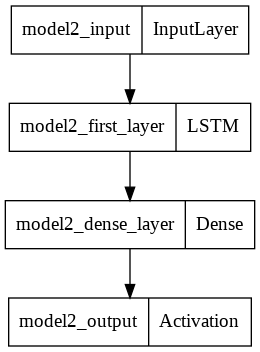

In [ ]:
np.random.seed()
#LSTM Model 2 for Sentiment Analysis 
model2_input = Input(shape=(backcandles, 7), name='model2_input')
model2_inputs = LSTM(150, name='model2_first_layer')(model2_input)
model2_inputs = Dense(1, name='model2_dense_layer')(model2_inputs)
model2_output = Activation('sigmoid', name='model2_output')(model2_inputs)
model2 = Model(inputs=model2_input, outputs=model2_output)
model2.summary()
plot_model(model2)

In [ ]:
adam = optimizers.Adam()
model2.compile(optimizer=adam, loss='mse')
model2.fit(x=x_train, y=y_train, batch_size=16, epochs=20, shuffle=True, validation_split = 0.1)

Epoch 1/20
104/104 [==============================] - 2s 8ms/step - loss: 0.2502 - val_loss: 0.2580
Epoch 2/20
104/104 [==============================] - 0s 5ms/step - loss: 0.2512 - val_loss: 0.2614
Epoch 3/20
104/104 [==============================] - 1s 6ms/step - loss: 0.2509 - val_loss: 0.2521
Epoch 4/20
104/104 [==============================] - 1s 8ms/step - loss: 0.2502 - val_loss: 0.2535
Epoch 5/20
104/104 [==============================] - 1s 6ms/step - loss: 0.2501 - val_loss: 0.2517
Epoch 6/20
104/104 [==============================] - 0s 4ms/step - loss: 0.2500 - val_loss: 0.2523
Epoch 7/20
104/104 [==============================] - 0s 4ms/step - loss: 0.2499 - val_loss: 0.2506
Epoch 8/20
104/104 [==============================] - 0s 4ms/step - loss: 0.2502 - val_loss: 0.2515
Epoch 9/20
104/104 [==============================] - 0s 4ms/step - loss: 0.2497 - val_loss: 0.2560
Epoch 10/20
104/104 [==============================] - 0s 4ms/step - loss: 0.2503 - val_loss: 0.2526

In [ ]:
model2_out = keras.Model(inputs=model2.input,
                                       outputs=model2.get_layer('model2_output').output)
model2_out = model2_out(x)

In [ ]:
print(model2_out)

tf.Tensor(
[[0.4754838 ]
 [0.46885133]
 [0.46381584]
 ...
 [0.49909842]
 [0.49459332]
 [0.5033737 ]], shape=(2272, 1), dtype=float32)


### Fully Connected Neural Network 

In [ ]:
#Concating outputs from 2 LSTM models 
FC_X = tf.concat([model1_out, model2_out], axis=1)

In [ ]:
print(FC_X)
print(FC_X.shape)

tf.Tensor(
[[0.03819318 0.4675325 ]
 [0.5878222  0.48409548]
 [0.42005768 0.45372042]
 ...
 [0.50339264 0.50887346]
 [0.544044   0.50477624]
 [0.45560578 0.50926274]], shape=(2307, 2), dtype=float32)
(2307, 2)


In [ ]:
# split data into train test sets
splitlimit = int(len(FC_X)*0.8)
print(splitlimit)
FC_X_train, FC_X_test = FC_X[:splitlimit], FC_X[splitlimit:]
print(FC_X_train.shape)
print(FC_X_test.shape)

1845
(1845, 2)
(462, 2)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


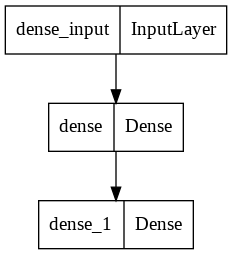

In [ ]:
#Fully Connected Layer NN 
modelFC = Sequential()
modelFC.add(Dense(128, activation='relu', input_dim=2))
modelFC.add(Dense(1, activation='sigmoid'))
modelFC.summary()
plot_model(modelFC)

In [ ]:
modelFC.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
hist = modelFC.fit(FC_X_train, y_train, epochs=20, batch_size=16, validation_split=0.15)

Epoch 1/20
98/98 [==============================] - 1s 4ms/step - loss: 0.1799 - accuracy: 0.7334 - val_loss: 0.1630 - val_accuracy: 0.7653
Epoch 2/20
98/98 [==============================] - 0s 3ms/step - loss: 0.1790 - accuracy: 0.7296 - val_loss: 0.1618 - val_accuracy: 0.7726
Epoch 3/20
98/98 [==============================] - 0s 5ms/step - loss: 0.1798 - accuracy: 0.7321 - val_loss: 0.1621 - val_accuracy: 0.7653
Epoch 4/20
98/98 [==============================] - 0s 5ms/step - loss: 0.1792 - accuracy: 0.7309 - val_loss: 0.1614 - val_accuracy: 0.7690
Epoch 5/20
98/98 [==============================] - 0s 2ms/step - loss: 0.1792 - accuracy: 0.7296 - val_loss: 0.1606 - val_accuracy: 0.7726
Epoch 6/20
98/98 [==============================] - 0s 3ms/step - loss: 0.1793 - accuracy: 0.7264 - val_loss: 0.1616 - val_accuracy: 0.7617
Epoch 7/20
98/98 [==============================] - 0s 2ms/step - loss: 0.1792 - accuracy: 0.7251 - val_loss: 0.1622 - val_accuracy: 0.7617
Epoch 8/20
98/98 [==

In [ ]:
y_predict = modelFC.predict([FC_X_test])
y_predict=np.where(y_predict > 0.50, 1,0)
for i in range(10):
    print(y_predict[i], y_test[i])

15/15 [==============================] - 0s 1ms/step
[0] [0.]
[1] [1.]
[0] [0.]
[1] [1.]
[0] [1.]
[1] [1.]
[0] [1.]
[0] [1.]
[0] [0.]
[0] [1.]


In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

MNB_f1 = round(f1_score(y_test, y_pred, average='weighted'), 3)
MNB_accuracy = round((accuracy_score(y_test, y_pred)*100),2)

print("Accuracy : " , MNB_accuracy , " %")
print("f1_score : " , MNB_f1)

              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73       245
         1.0       0.69      0.76      0.73       217

    accuracy                           0.73       462
   macro avg       0.73      0.73      0.73       462
weighted avg       0.73      0.73      0.73       462

[[171  74]
 [ 51 166]]
Accuracy :  72.94  %
f1_score :  0.73
